<a href="https://colab.research.google.com/github/oduoranto/Machine-Learning/blob/main/Fish_Marketipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
fish_data = pd.read_csv('/content/Fishers maket.csv')

In [41]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [42]:
fish_data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [43]:
fish_data['Species'].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [44]:
fish_data.shape

(159, 7)

In [45]:
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [46]:
fish_data.groupby('Species').mean()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


In [47]:
fish_data.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


Visualizing the data avarage weight vs Species

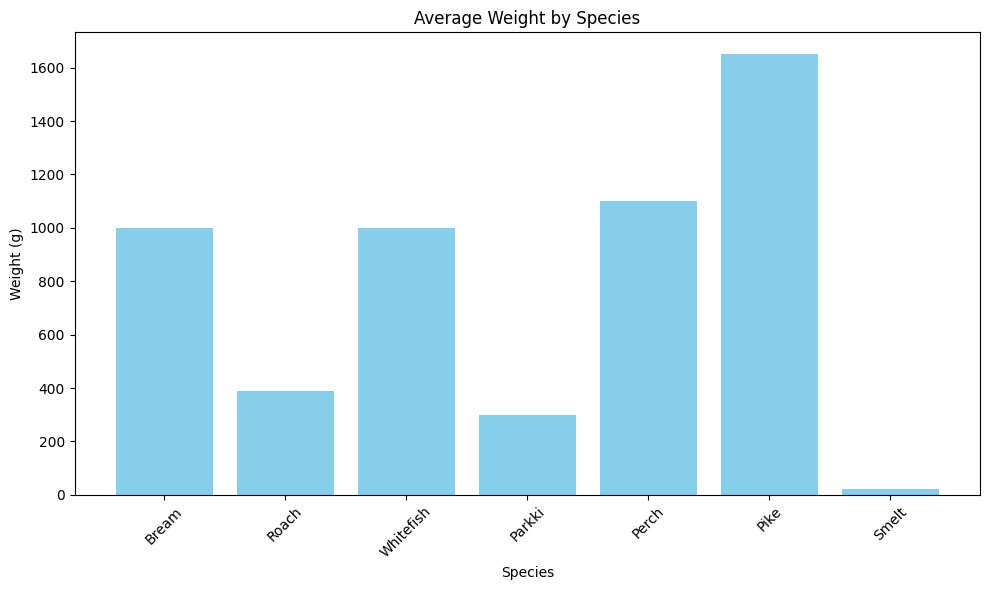

In [48]:

plt.figure(figsize=(10, 6))
plt.bar(fish_data["Species"], fish_data["Weight"], color="skyblue")
plt.title("Average Weight by Species")
plt.xlabel("Species")
plt.ylabel("Weight (g)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

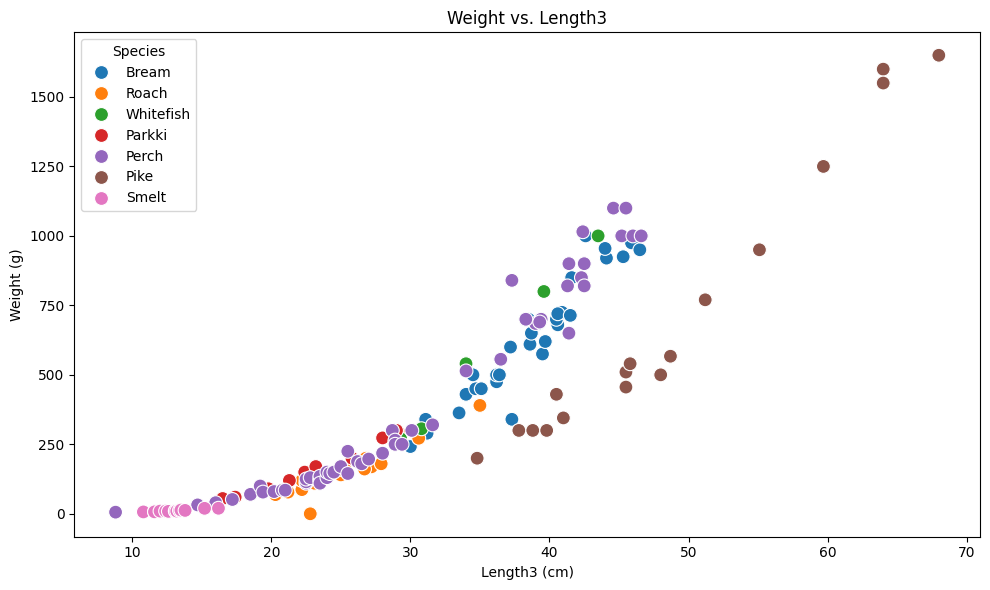

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fish_data, x="Length3", y="Weight", hue="Species", s=100)
plt.title("Weight vs. Length3")
plt.xlabel("Length3 (cm)")
plt.ylabel("Weight (g)")
plt.tight_layout()
plt.show()


Seperating the targets from features

In [50]:
le = LabelEncoder()

# Fit and transform
fish_data["SpeciesEncoded"] = le.fit_transform(fish_data["Species"])

print(fish_data[["Species", "SpeciesEncoded"]])

    Species  SpeciesEncoded
0     Bream               0
1     Bream               0
2     Bream               0
3     Bream               0
4     Bream               0
..      ...             ...
154   Smelt               5
155   Smelt               5
156   Smelt               5
157   Smelt               5
158   Smelt               5

[159 rows x 2 columns]


In [51]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,SpeciesEncoded
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0


In [52]:
X = fish_data.drop(columns=['Species','SpeciesEncoded'],axis=1)
Y = fish_data['SpeciesEncoded']

In [53]:
X.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [54]:
model = LogisticRegression()

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [56]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
prediction = model.predict(X_train)
accuracy_score = accuracy_score(prediction, Y_train)
print('The accurarcy : ', accuracy_score)

The accurarcy :  0.7086614173228346


In [58]:
model.fit( X_test, Y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
from sklearn.metrics import accuracy_score


In [62]:
prediction2 = model.predict(X_test)
error_score = accuracy_score(Y_test, prediction2)
print('The accuracy score for test data : ', error_score)

The accuracy score for test data :  0.875
